In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
!pip install openpyxl


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
df = pd.read_excel("C:/Users/nehas/Downloads/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [40]:
df.shape

(541909, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [42]:
print('Number of unique invoice available :', df['InvoiceNo'].nunique())

Number of unique invoice available : 25900


In [43]:
print('Number of unique stock code available :', df['StockCode'].nunique())

Number of unique stock code available : 4070


In [44]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [45]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [46]:
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [47]:
print('Number of unique stock code available :', df['CustomerID'].nunique())

Number of unique stock code available : 4372


In [48]:
print('Number of unique stock code available :', df['Country'].nunique())


Number of unique stock code available : 38


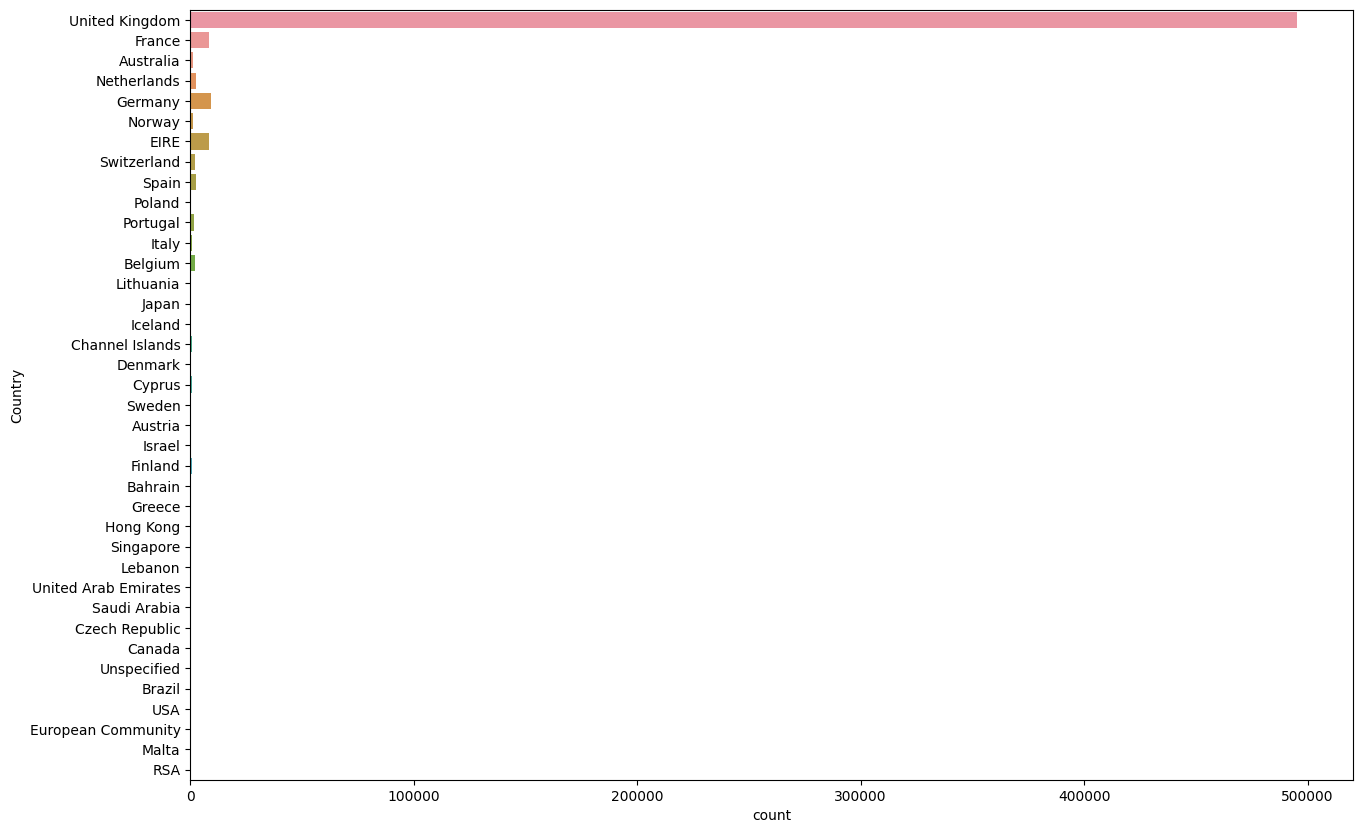

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, y='Country')
plt.show()

In [50]:
df['Country'].value_counts(normalize=True) * 100

Country
United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United

In [51]:
df[df['Country'] == 'United Kingdom']['CustomerID'].nunique()

3950

In [52]:
df = df[df['Country'] == 'United Kingdom']

In [53]:
df.shape

(495478, 8)

In [54]:
df_copy = df.copy()

In [55]:
df.drop('Country', axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.2+ MB


In [57]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
dtype: int64

In [58]:
df.isnull().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.293454
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     26.963861
dtype: float64

In [59]:
df.dropna(subset=['CustomerID'], inplace=True)

In [60]:
df.shape

(361878, 7)

In [61]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [62]:
df[df['InvoiceNo'].str.startswith('C', na=False)]
#7533 transactions has been cancelled

df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

df.shape

(354345, 7)

In [63]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,354345.000000,354345.000000
mean,12.048913,2.963793
std,190.428127,17.862067
min,1.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [64]:
df = df[~(df['UnitPrice'] == 0)]
df.shape

(354321, 7)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.6+ MB


In [66]:
df[df.duplicated() == True].shape

(5118, 7)

In [67]:
df.shape

(354321, 7)

In [68]:
df = df[df['InvoiceDate'] >= '2010-12-09']

df.shape

(342454, 7)

In [69]:
#RFM Analysis

In [70]:
max_date = df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:49:00')

In [71]:
rfm_df = df.groupby('CustomerID', as_index=False)['InvoiceDate'].max()

rfm_df.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [72]:
(rfm_df['InvoiceDate'] - max_date)

0      -326 days +21:12:00
1        -2 days +01:45:00
2        -1 days +23:31:00
3        -4 days +21:07:00
4        -3 days +02:23:00
               ...        
3857   -278 days +21:03:00
3858   -181 days +22:04:00
3859     -8 days +22:54:00
3860     -4 days +23:13:00
3861    -43 days +20:40:00
Name: InvoiceDate, Length: 3862, dtype: timedelta64[ns]

In [73]:
rfm_df['Recency']  = rfm_df['InvoiceDate'].apply(lambda x: (max_date - x).days)

In [74]:
rfm_df.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [75]:
rfm_df.drop('InvoiceDate', axis=1, inplace=True)

In [76]:
#frequency

In [77]:
rfm_df['Frequency'] = df.groupby(['CustomerID'], as_index=False)['InvoiceNo'].nunique()['InvoiceNo']

In [78]:
rfm_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,1,10
2,12748.0,0,195
3,12749.0,3,5
4,12820.0,2,4


In [79]:
df['Total_amount'] = df['UnitPrice'] * df['Quantity']

In [80]:
rfm_df['Monetary'] = df.groupby('CustomerID', as_index=False)['Total_amount'].sum()['Total_amount']

In [81]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,10,3837.45
2,12748.0,0,195,31854.58
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


In [82]:
df[df['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,77183.6


In [83]:
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  5646700.09


In [84]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,CustomerID,Recency,Frequency,Monetary,Rank
0,12346.0,325,1,77183.60,5.0
1,12747.0,1,10,3837.45,309.0
2,12748.0,0,195,31854.58,25.0
3,12749.0,3,5,4090.88,282.0
4,12820.0,2,4,942.34,1478.0


In [85]:
customers_rank.sort_values('Rank',ascending=True)

,CustomerID,Recency,Frequency,Monetary,Rank
3728,18102.0,0,57,233736.93,1.0
3271,17450.0,7,44,192521.95,2.0
2566,16446.0,0,2,168472.50,3.0
3313,17511.0,2,29,87591.70,4.0
0,12346.0,325,1,77183.60,5.0
...,...,...,...,...,...
2872,16878.0,83,1,13.30,3858.0
3630,17956.0,248,1,12.75,3859.0
2572,16454.0,44,2,6.90,3860.0
1384,14792.0,63,1,6.20,3861.0


In [86]:
top_20_cutoff = 3863 *20 /100
top_20_cutoff

772.6

In [87]:
#sum the monetary values over the customer with rank <=773
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 772]['Monetary'].sum()
revenueByTop20

5158179.370999999

In [88]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles.drop('CustomerID', axis=1, inplace=True)

In [89]:
quantiles.to_dict()

{'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 133.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 296.7125, 0.5: 642.605, 0.75: 1554.905},
 'Rank': {0.25: 966.25, 0.5: 1931.5, 0.75: 2896.75}}

In [90]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [91]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [92]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
0,12346.0,325,1,77183.60,5.0,1,1,4
1,12747.0,1,10,3837.45,309.0,4,4,4
2,12748.0,0,195,31854.58,25.0,4,4,4
3,12749.0,3,5,4090.88,282.0,4,3,4
4,12820.0,2,4,942.34,1478.0,4,3,3


In [93]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,325,1,77183.60,5.0,1,1,4,114
1,12747.0,1,10,3837.45,309.0,4,4,4,444
2,12748.0,0,195,31854.58,25.0,4,4,4,444
3,12749.0,3,5,4090.88,282.0,4,3,4,434
4,12820.0,2,4,942.34,1478.0,4,3,3,433


In [94]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
3728,18102.0,0,57,233736.93,1.0,4,4,4,444
3271,17450.0,7,44,192521.95,2.0,4,4,4,444
3313,17511.0,2,29,87591.70,4.0,4,4,4,444
2730,16684.0,3,28,66653.56,7.0,4,4,4,444
893,14096.0,3,17,65164.79,8.0,4,4,4,444
614,13694.0,3,49,64197.50,9.0,4,4,4,444
1751,15311.0,0,88,59416.19,10.0,4,4,4,444
3625,17949.0,0,44,57196.48,11.0,4,4,4,444
2086,15769.0,6,25,56160.92,12.0,4,4,4,444
188,13089.0,2,94,55595.21,13.0,4,4,4,444


In [95]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  399
Loyal Customers:  752
Big Spenders:  966
Almost Lost:  60
Lost Customers:  10
Lost Cheap Customers:  390


In [96]:
#Preprocess Data

In [97]:
rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore','Rank'],axis=1)
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,10,3837.45
2,12748.0,0,195,31854.58
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


In [98]:
rfm_data.index = rfm_data['CustomerID']

In [99]:
rfm_data = rfm_data.drop('CustomerID', axis=1, inplace=False)

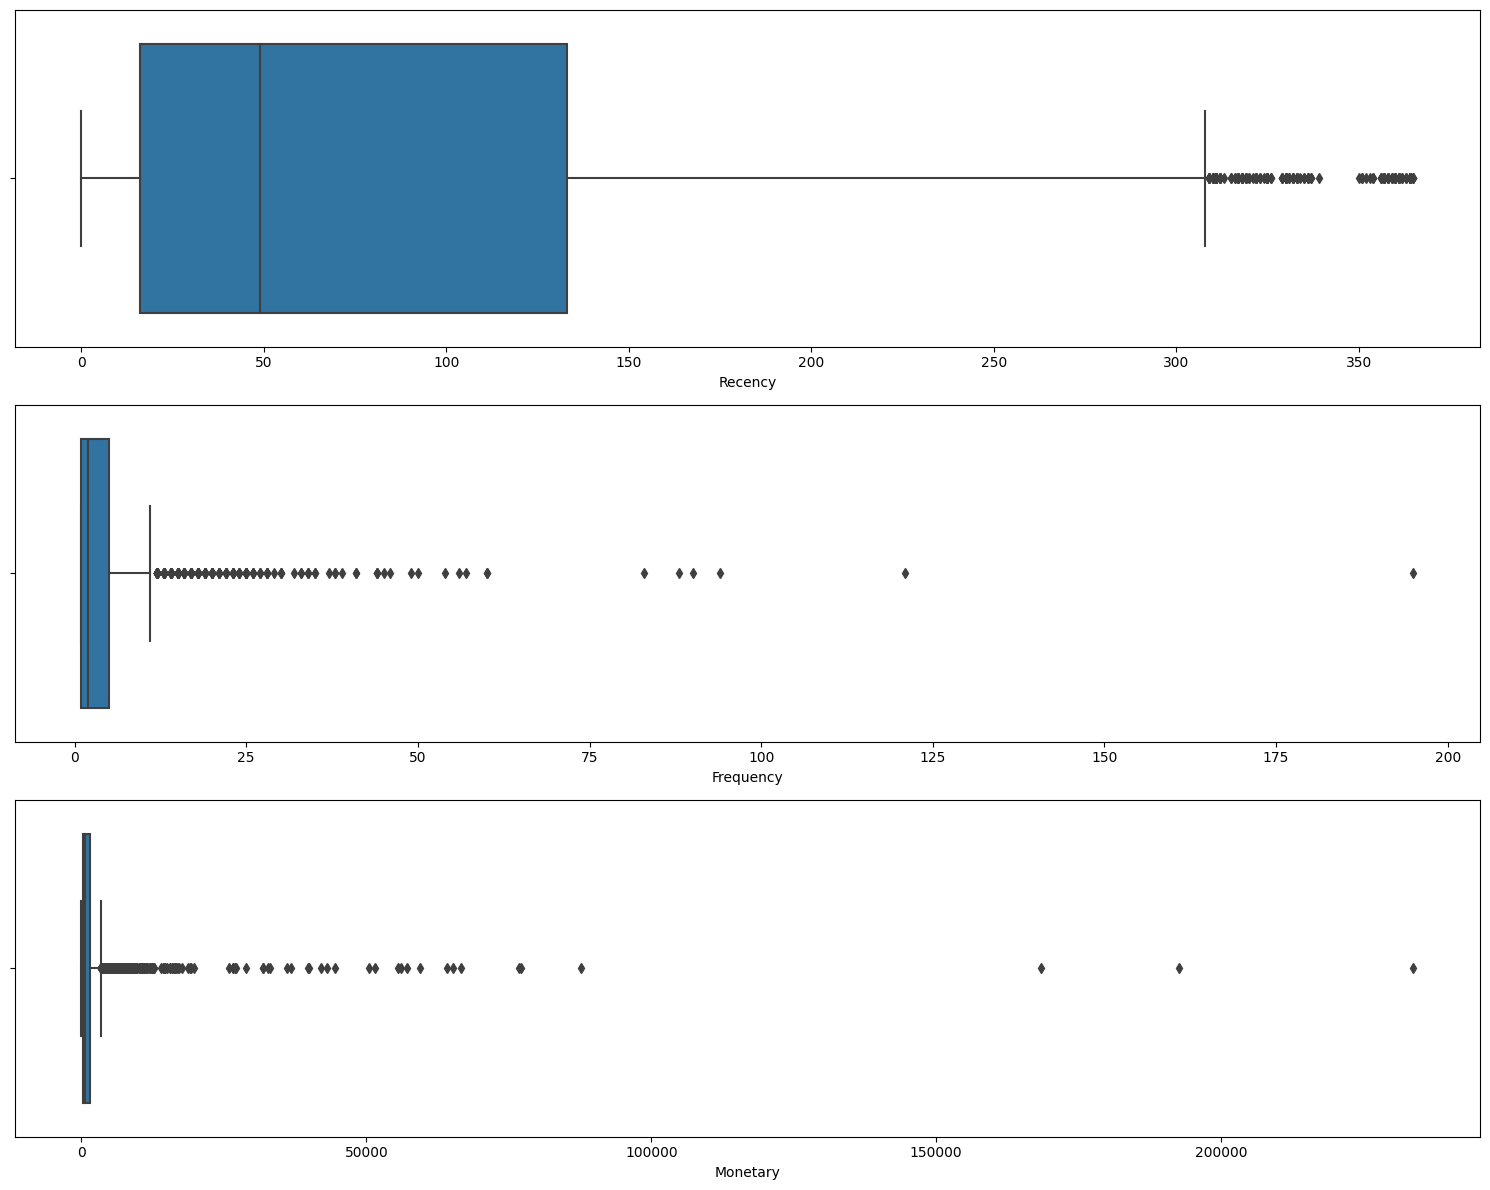

In [106]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

sns.boxplot(x=rfm_data['Recency'], ax=ax[0])
sns.boxplot(x=rfm_data['Frequency'], ax=ax[1])
sns.boxplot(x=rfm_data['Monetary'], ax=ax[2])

plt.tight_layout()
plt.show()

In [103]:
print(rfm_data.columns)


Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


In [104]:
print(rfm_data.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12747.0           1         10   3837.45
12748.0           0        195  31854.58
12749.0           3          5   4090.88
12820.0           2          4    942.34


In [107]:
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,10,3837.45
12748.0,0,195,31854.58
12749.0,3,5,4090.88
12820.0,2,4,942.34


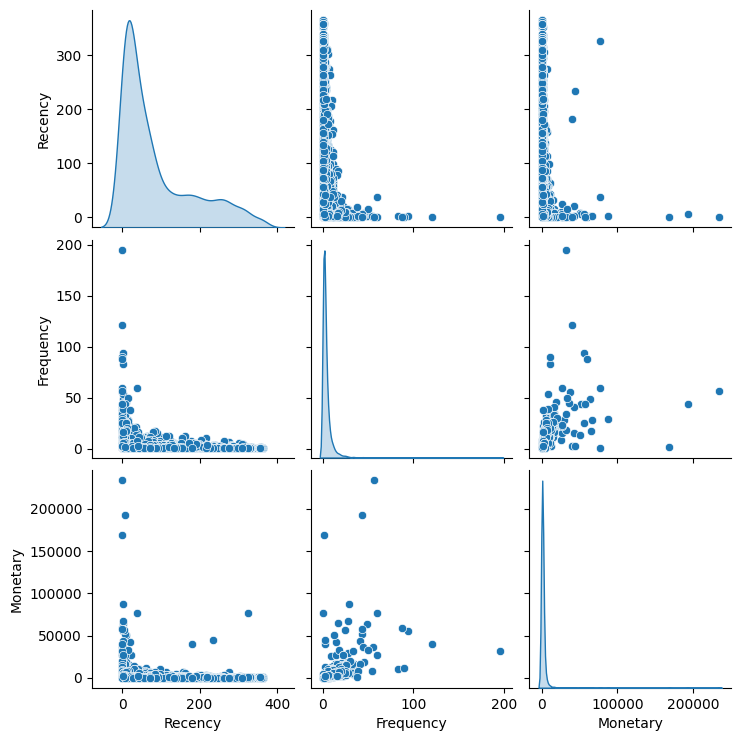

In [108]:
sns.pairplot(rfm_data, diag_kind='kde')

In [109]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [110]:
features = rfm_data.columns

In [111]:
rfm_data_pt = pd.DataFrame(pt.fit_transform(rfm_data), columns=features, index=rfm_data.index)

In [112]:
rfm_data_pt.describe()

,Recency,Frequency,Monetary
count,3.862000e+03,3.862000e+03,3.862000e+03
mean,2.492971e-16,-1.471865e-17,-8.132053e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.108539e+00,-1.148776e+00,-5.036243e+00
25%,-7.337593e-01,-1.148776e+00,-6.573261e-01
50%,5.238868e-03,-1.793735e-01,-2.056073e-03
75%,8.191072e-01,9.127950e-01,6.960813e-01
max,1.812498e+00,2.348790e+00,3.785663e+00


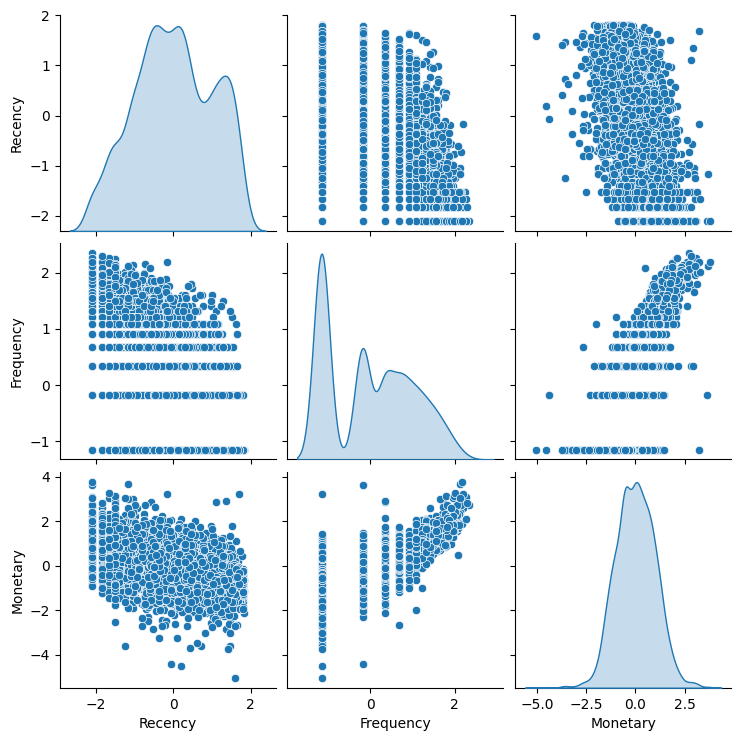

In [113]:
sns.pairplot(rfm_data_pt, diag_kind='kde')


In [114]:
#K-means Implementation

In [115]:
from sklearn.cluster import KMeans

In [116]:
cluster_errors = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(rfm_data_pt)
    cluster_errors.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'No_cluster' : n_clusters, 'WCSS_errors' :cluster_errors })

In [117]:
df_elbow

,No_cluster,WCSS_errors
0,2,5460.293822
1,3,4203.773730
2,4,3303.064000
3,5,2781.711895
4,6,2419.545064
5,7,2192.925764
6,8,1993.426712
7,9,1825.008002
8,10,1685.132419
9,11,1575.173919


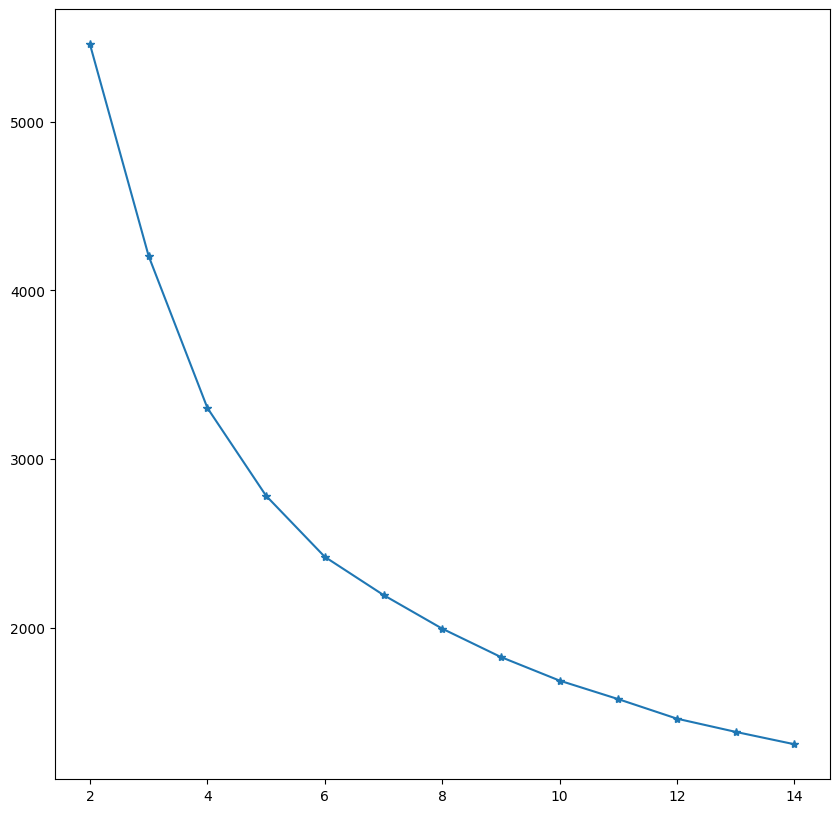

In [118]:
plt.figure(figsize=(10,10))
plt.plot(df_elbow['No_cluster'], df_elbow['WCSS_errors'], marker='*')

plt.show()

#we can consider n=3, we can recheck with sil

In [119]:
from sklearn.metrics import silhouette_score

In [120]:

sil_score = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(rfm_data_pt)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(rfm_data_pt, labels ))

df_sil = pd.DataFrame({'No_cluster' : n_clusters, 'Silhouette_score' :sil_score })

In [121]:
df_sil

,No_cluster,Silhouette_score
0,2,0.435352
1,3,0.329070
2,4,0.334617
3,5,0.326479
4,6,0.324462
5,7,0.303474
6,8,0.297415
7,9,0.300743
8,10,0.299469
9,11,0.296145


In [122]:
#Clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(rfm_data_pt)

labels = kmeans.labels_
rfm_data_pt['K_labels'] = labels

In [123]:
rfm_data_pt.head()

,Recency,Frequency,Monetary,K_labels
CustomerID,,,,
12346.0,1.688654,-1.148776,3.213872,0
12747.0,-1.834272,1.489057,1.356792,0
12748.0,-2.108539,2.348790,2.715793,0
12749.0,-1.523331,0.912795,1.401631,0
12820.0,-1.657136,0.679616,0.306938,0


<Axes: xlabel='K_labels', ylabel='count'>

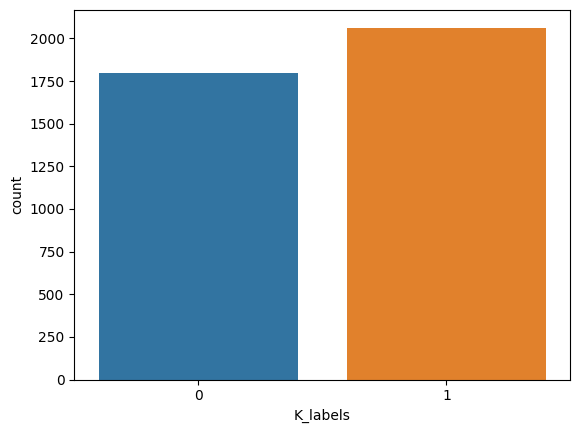

In [125]:
sns.countplot(x='K_labels', data=rfm_data_pt)

In [126]:
X = rfm_data_pt.iloc[:, 0:3]
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.688654,-1.148776,3.213872
12747.0,-1.834272,1.489057,1.356792
12748.0,-2.108539,2.348790,2.715793
12749.0,-1.523331,0.912795,1.401631
12820.0,-1.657136,0.679616,0.306938


In [127]:
from sklearn.cluster import AgglomerativeClustering 
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

model2.fit(X)

AgglomerativeClustering(affinity='euclidean')

In [128]:
rfm_data_pt['Aglo_Labels'] = model2.labels_

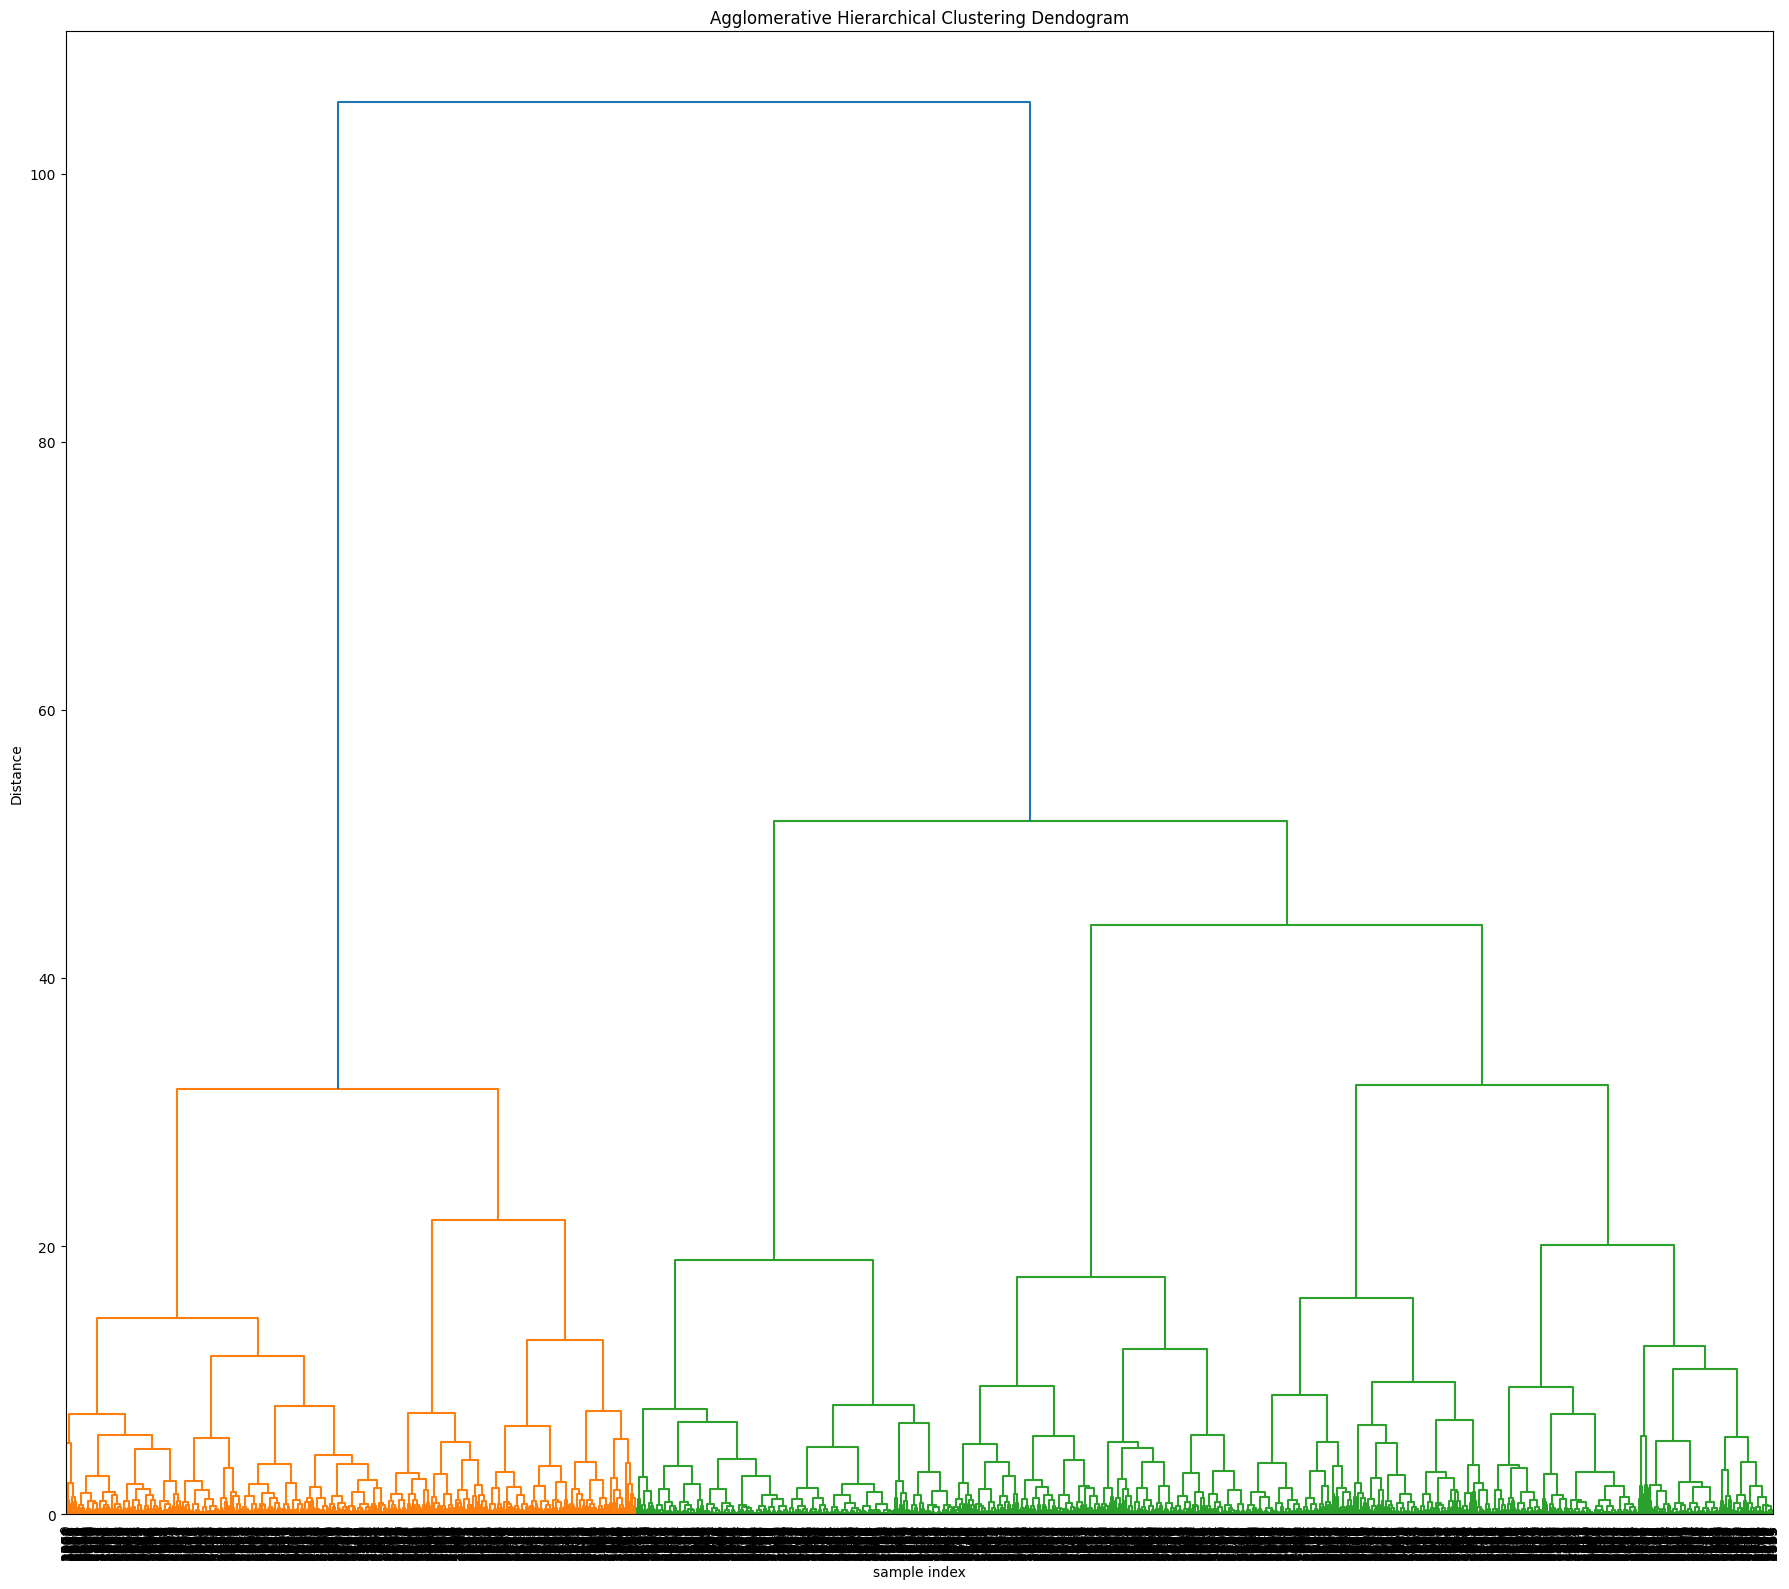

In [129]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()


In [130]:
X_df = pd.DataFrame(X, columns= X.columns)
X_df["group"] = rfm_data_pt['Aglo_Labels']

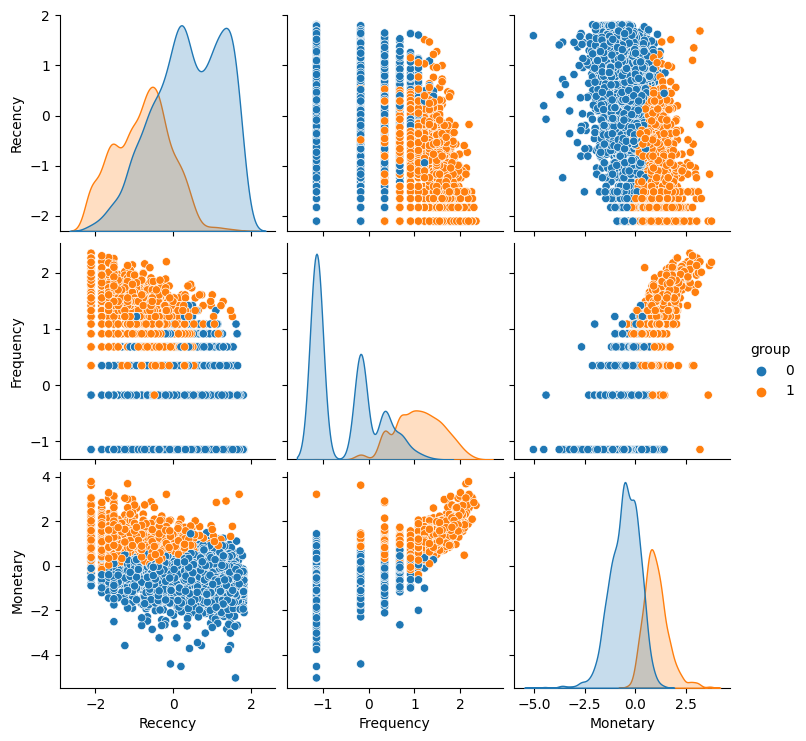

In [131]:
sns.pairplot(X_df, hue='group')

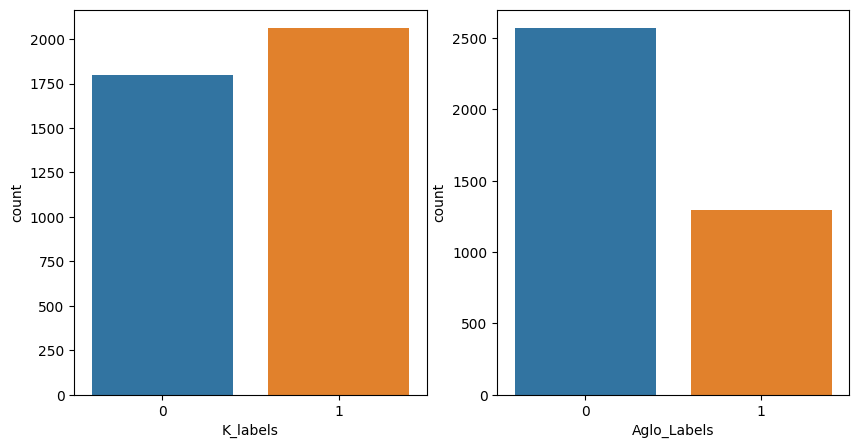

In [133]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot countplot for 'K_labels'
sns.countplot(x='K_labels', data=rfm_data_pt, ax=ax[0])

# Plot countplot for 'Aglo_Labels'
sns.countplot(x='Aglo_Labels', data=rfm_data_pt, ax=ax[1])

plt.show()

In [ ]:
#Applying PCA

In [134]:
from sklearn.decomposition import PCA
X = rfm_data_pt.iloc[:, 0:3]
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.688654,-1.148776,3.213872
12747.0,-1.834272,1.489057,1.356792
12748.0,-2.108539,2.348790,2.715793
12749.0,-1.523331,0.912795,1.401631
12820.0,-1.657136,0.679616,0.306938


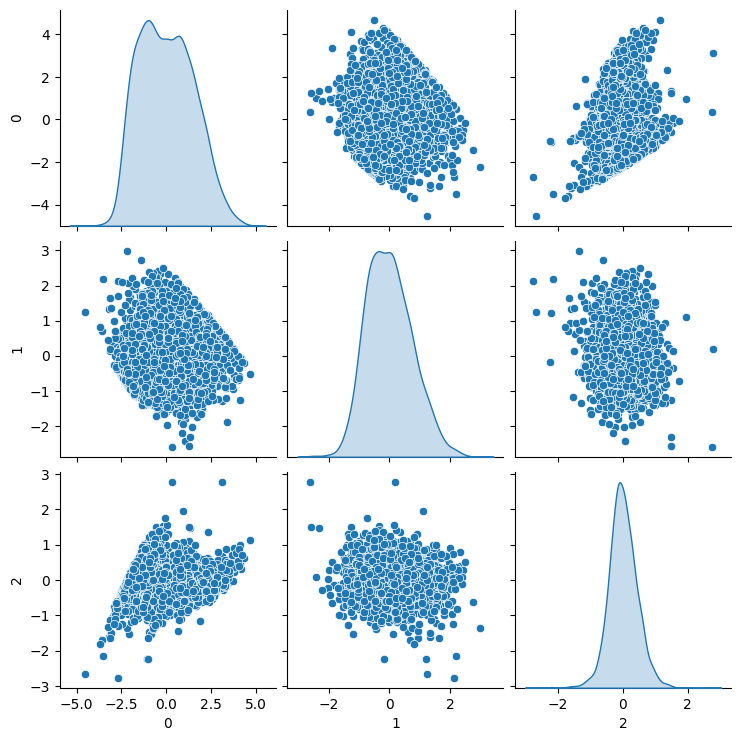

In [135]:
pca = PCA()
X = pca.fit_transform(X)
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

<Axes: >

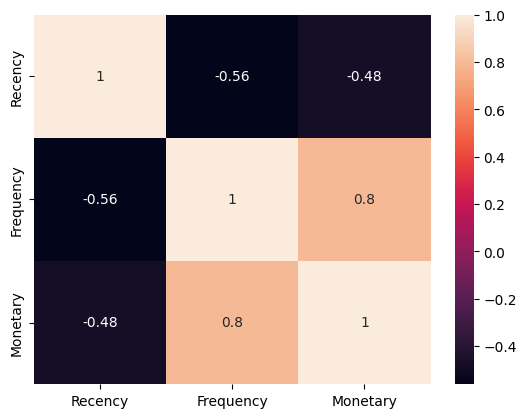

In [136]:
sns.heatmap(rfm_data_pt.iloc[:, 0:3].corr(), annot=True)

<Axes: >

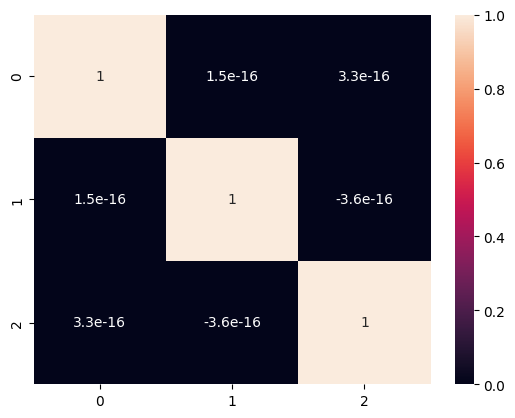

In [137]:
sns.heatmap(pd.DataFrame(X).corr(), annot=True)

In [138]:
pca_var = list(pca.explained_variance_ratio_)
pca_var

[0.7455345067967979, 0.18883853732701106, 0.06562695587619106]

In [139]:
from itertools import accumulate
list(accumulate(pca_var, lambda x,y : x+y ))

[0.7455345067967979, 0.934373044123809, 1.0]

In [140]:
X = rfm_data_pt.iloc[:, 0:3]

pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

pca_df = pd.DataFrame(pca_X, columns=['PC1', 'PC2'])

In [141]:
pca.explained_variance_ratio_

array([0.74553451, 0.18883854])

In [142]:
pca.components_

array([[-0.51276637,  0.6172687 ,  0.59669926],
       [-0.84961015, -0.26492386, -0.45604599]])

In [143]:
#elbow method to find out no of clusters

cluster_errors = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(pca_df)
    cluster_errors.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'No_cluster' : n_clusters, 'WCSS_errors' :cluster_errors })

In [144]:
df_elbow

,No_cluster,WCSS_errors
0,2,4710.694631
1,3,3453.485631
2,4,2570.130255
3,5,2053.363450
4,6,1688.666953
5,7,1494.801092
6,8,1344.858117
7,9,1208.768391
8,10,1095.701108
9,11,1002.660196


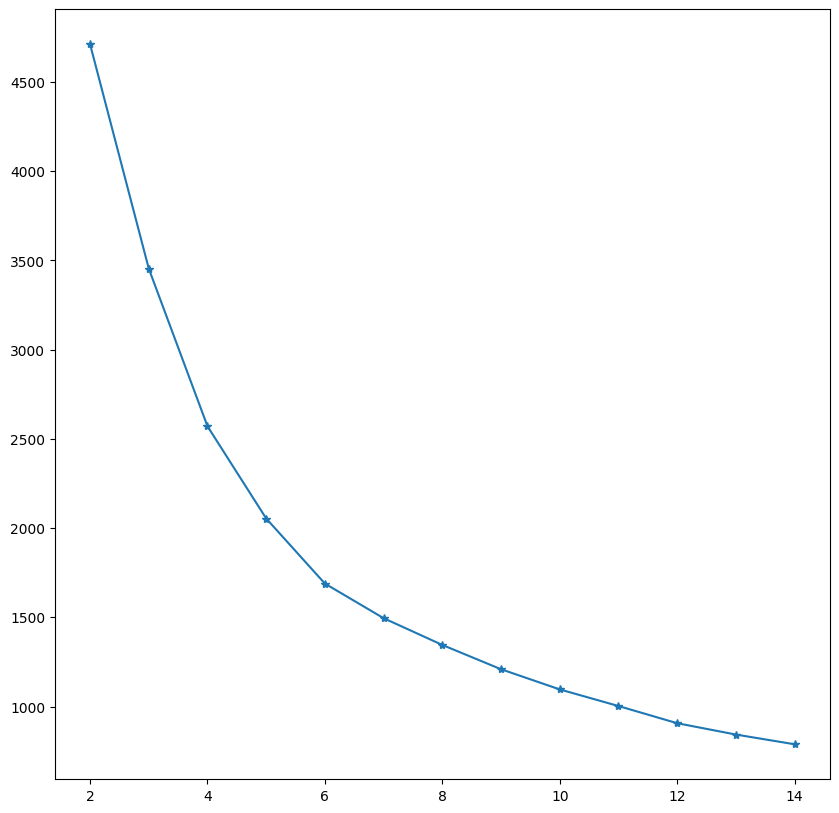

In [145]:
plt.figure(figsize=(10,10))
plt.plot(df_elbow['No_cluster'], df_elbow['WCSS_errors'], marker='*')

plt.show()


In [146]:
from sklearn.metrics import silhouette_score

In [147]:
#silhouette_score

sil_score = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(pca_df, labels ))

df_sil = pd.DataFrame({'No_cluster' : n_clusters, 'Silhouette_score' :sil_score })

In [148]:
df_sil

,No_cluster,Silhouette_score
0,2,0.467701
1,3,0.365973
2,4,0.380656
3,5,0.379067
4,6,0.382002
5,7,0.372297
6,8,0.364430
7,9,0.361223
8,10,0.339763
9,11,0.340273


In [149]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_df)

labels = kmeans.labels_

In [150]:
X1 = rfm_data_pt.iloc[:, 0:3]

X_df = pd.DataFrame(X1, columns= X1.columns)
X_df["group"] = labels

In [151]:
X_df.head()

,Recency,Frequency,Monetary,group
CustomerID,,,,
12346.0,1.688654,-1.148776,3.213872,1
12747.0,-1.834272,1.489057,1.356792,1
12748.0,-2.108539,2.348790,2.715793,1
12749.0,-1.523331,0.912795,1.401631,1
12820.0,-1.657136,0.679616,0.306938,1


In [152]:
pca_df['K_label'] = labels

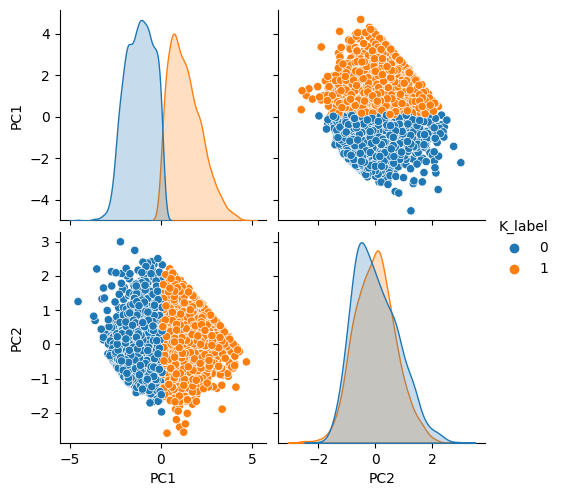

In [153]:
sns.pairplot(pca_df, hue='K_label')

In [154]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
model2.fit(pca_X)

AgglomerativeClustering(affinity='euclidean')

In [155]:
label = model2.labels_

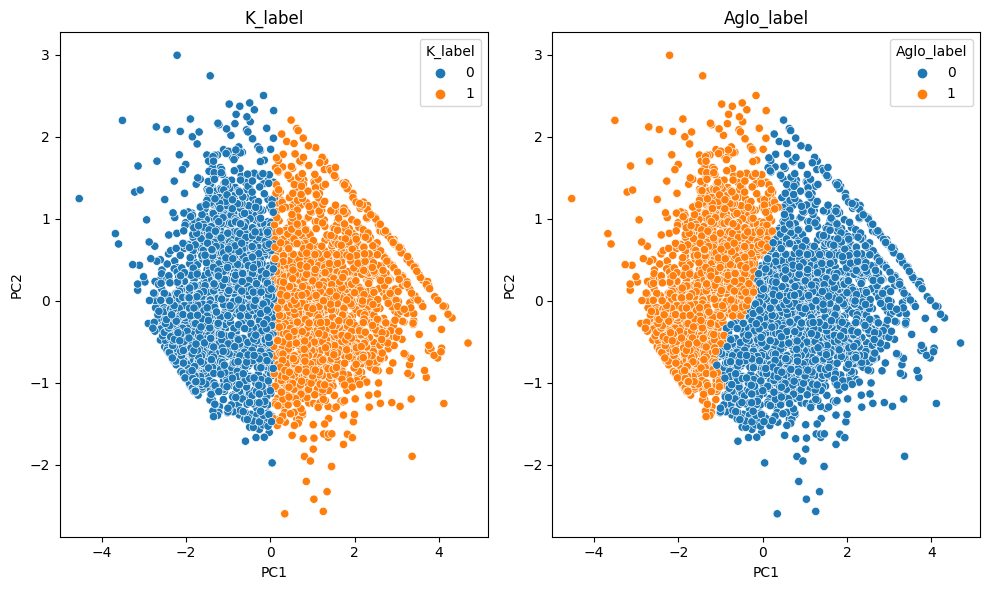

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='K_label', data=pca_df, ax=ax[0])
ax[0].set_title('K_label')

# Scatter plot with 'Aglo_label'
sns.scatterplot(x='PC1', y='PC2', hue='Aglo_label', data=pca_df, ax=ax[1])
ax[1].set_title('Aglo_label')

plt.tight_layout()
plt.show()

In [ ]:
#Classification model, Random forest classification

In [158]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [159]:
y = pca_df['K_label']
X = pca_df[['PC1', 'PC2']]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [161]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [162]:
y_train_proba = rfc.predict_proba(X_train)
y_train_pred = rfc.predict(X_train)

y_test_proba = rfc.predict_proba(X_test)
y_test_pred = rfc.predict(X_test)

In [163]:
print('Classiifcation report for train data :')
print(classification_report(y_train, y_train_pred))

Classiifcation report for train data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1444
           1       1.00      1.00      1.00      1259

    accuracy                           1.00      2703
   macro avg       1.00      1.00      1.00      2703
weighted avg       1.00      1.00      1.00      2703



In [164]:
print('Classiifcation report for test data :')
print(classification_report(y_test, y_test_pred))

Classiifcation report for test data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       619
           1       1.00      1.00      1.00       540

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159

